In [16]:
import pandas as pd
df = pd.read_csv('predictions.csv')
churn_probabilities = df['Churn_Probability'].values
print(churn_probabilities)

[0.07483111 0.11729054 0.20319451 ... 0.0016051  0.18416389 0.19169119]


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

def plot_solution(x,num_customers,churn_probabilities):
    # Determine promotion strategy for each customer

    promotion_strategy = ["Offer" if x[i].x > 0.5 else "No Offer" for i in range(num_customers)]

    # # Plot churn probabilities and promotion strategy
    # plt.figure(figsize=(25, 16), dpi=200)
    # plt.bar(range(num_customers), churn_probabilities, color=['green' if s == 'Offer' else 'red' for s in promotion_strategy])
    # plt.xlabel('Customer', fontsize=20)
    # plt.ylabel('Churn Probability', fontsize=20)
    # plt.title('Churn Probabilities and Promotion Strategy', fontsize=20)
    # plt.xticks([])
    # plt.yticks(fontsize=16)
    # plt.legend(['No Offer', 'Offer'], loc='upper right', fontsize=18)
    # plt.show()

    # Count the number of customers who receive a promotion
    num_customers_offer = sum(1 for strategy in promotion_strategy if strategy == "Offer")
    num_customers_no_offer = len(promotion_strategy) - num_customers_offer

    avg_churn_prob_all = sum(churn_probabilities) / num_customers
    # Calculate the average churn probability of customers who receive a promotion
    avg_churn_prob_offer = sum(churn_probabilities[i] for i in range(len(x)) if promotion_strategy[i] == "Offer") / num_customers_offer
    # Calculate the average churn probability of customers who do not receive a promotion
    avg_churn_prob_no_offer = sum(churn_probabilities[i] for i in range(len(x)) if promotion_strategy[i] == "No Offer") / num_customers_no_offer


    # Pie chart: Proportion of customers who receive a promotion vs. those who do not
    labels = ['Offer', 'No Offer']
    sizes = [num_customers_offer, num_customers_no_offer]
    colors = ['lightgreen', 'lightcoral']
    plt.figure(figsize=(10, 6), dpi=300)
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
    plt.title('Proportion of Customers Offered a Promotion')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

    # Bar chart: Average churn probability of customers who receive a promotion
    plt.figure(figsize=(12, 8), dpi=250)
    barplot = plt.bar(['Offer', 'No Offer'], [avg_churn_prob_offer, avg_churn_prob_no_offer], color=['lightgreen', 'lightcoral'])
    plt.xlabel('Promotion Strategy')
    plt.ylabel('Average Churn Probability')
    plt.title('Average Churn Probability of Customers Who Receive a Promotion')
    plt.ylim(0, 1)
    # Add a line for the average churn probability of all customers
    avg = round(avg_churn_prob_all, 2)
    plt.axhline(y=avg_churn_prob_all, color='royalblue', linestyle='--', label=f'Avg Churn Prob. for All Customers: {avg}')
    plt.legend()
    for bar in barplot:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=16)  # Add the numbers on top of the bars
    plt.show()



## Model 1 - BASIC PROMOTION STRATEGY

In [18]:
import os
# Set the GRB_LICENSE_FILE environment variable
os.environ['GRB_LICENSE_FILE'] = '/Users/nayeema/GUROBI/gurobi.lic'

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 8820 columns and 8820 nonzeros
Model fingerprint: 0xdd55c97c
Variable types: 0 continuous, 8820 integer (8820 binary)
Coefficient statistics:
  Matrix range     [5e+02, 5e+02]
  Objective range  [2e-16, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+06, 1e+06]
Found heuristic solution: objective 385.7386980
Presolve removed 0 rows and 8 columns
Presolve time: 0.01s
Presolved: 1 rows, 8812 columns, 8812 nonzeros
Variable types: 0 continuous, 8812 integer (8812 binary)
Found heuristic solution: objective 403.7774668

Root relaxation: objective 6.108111e+02, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0 

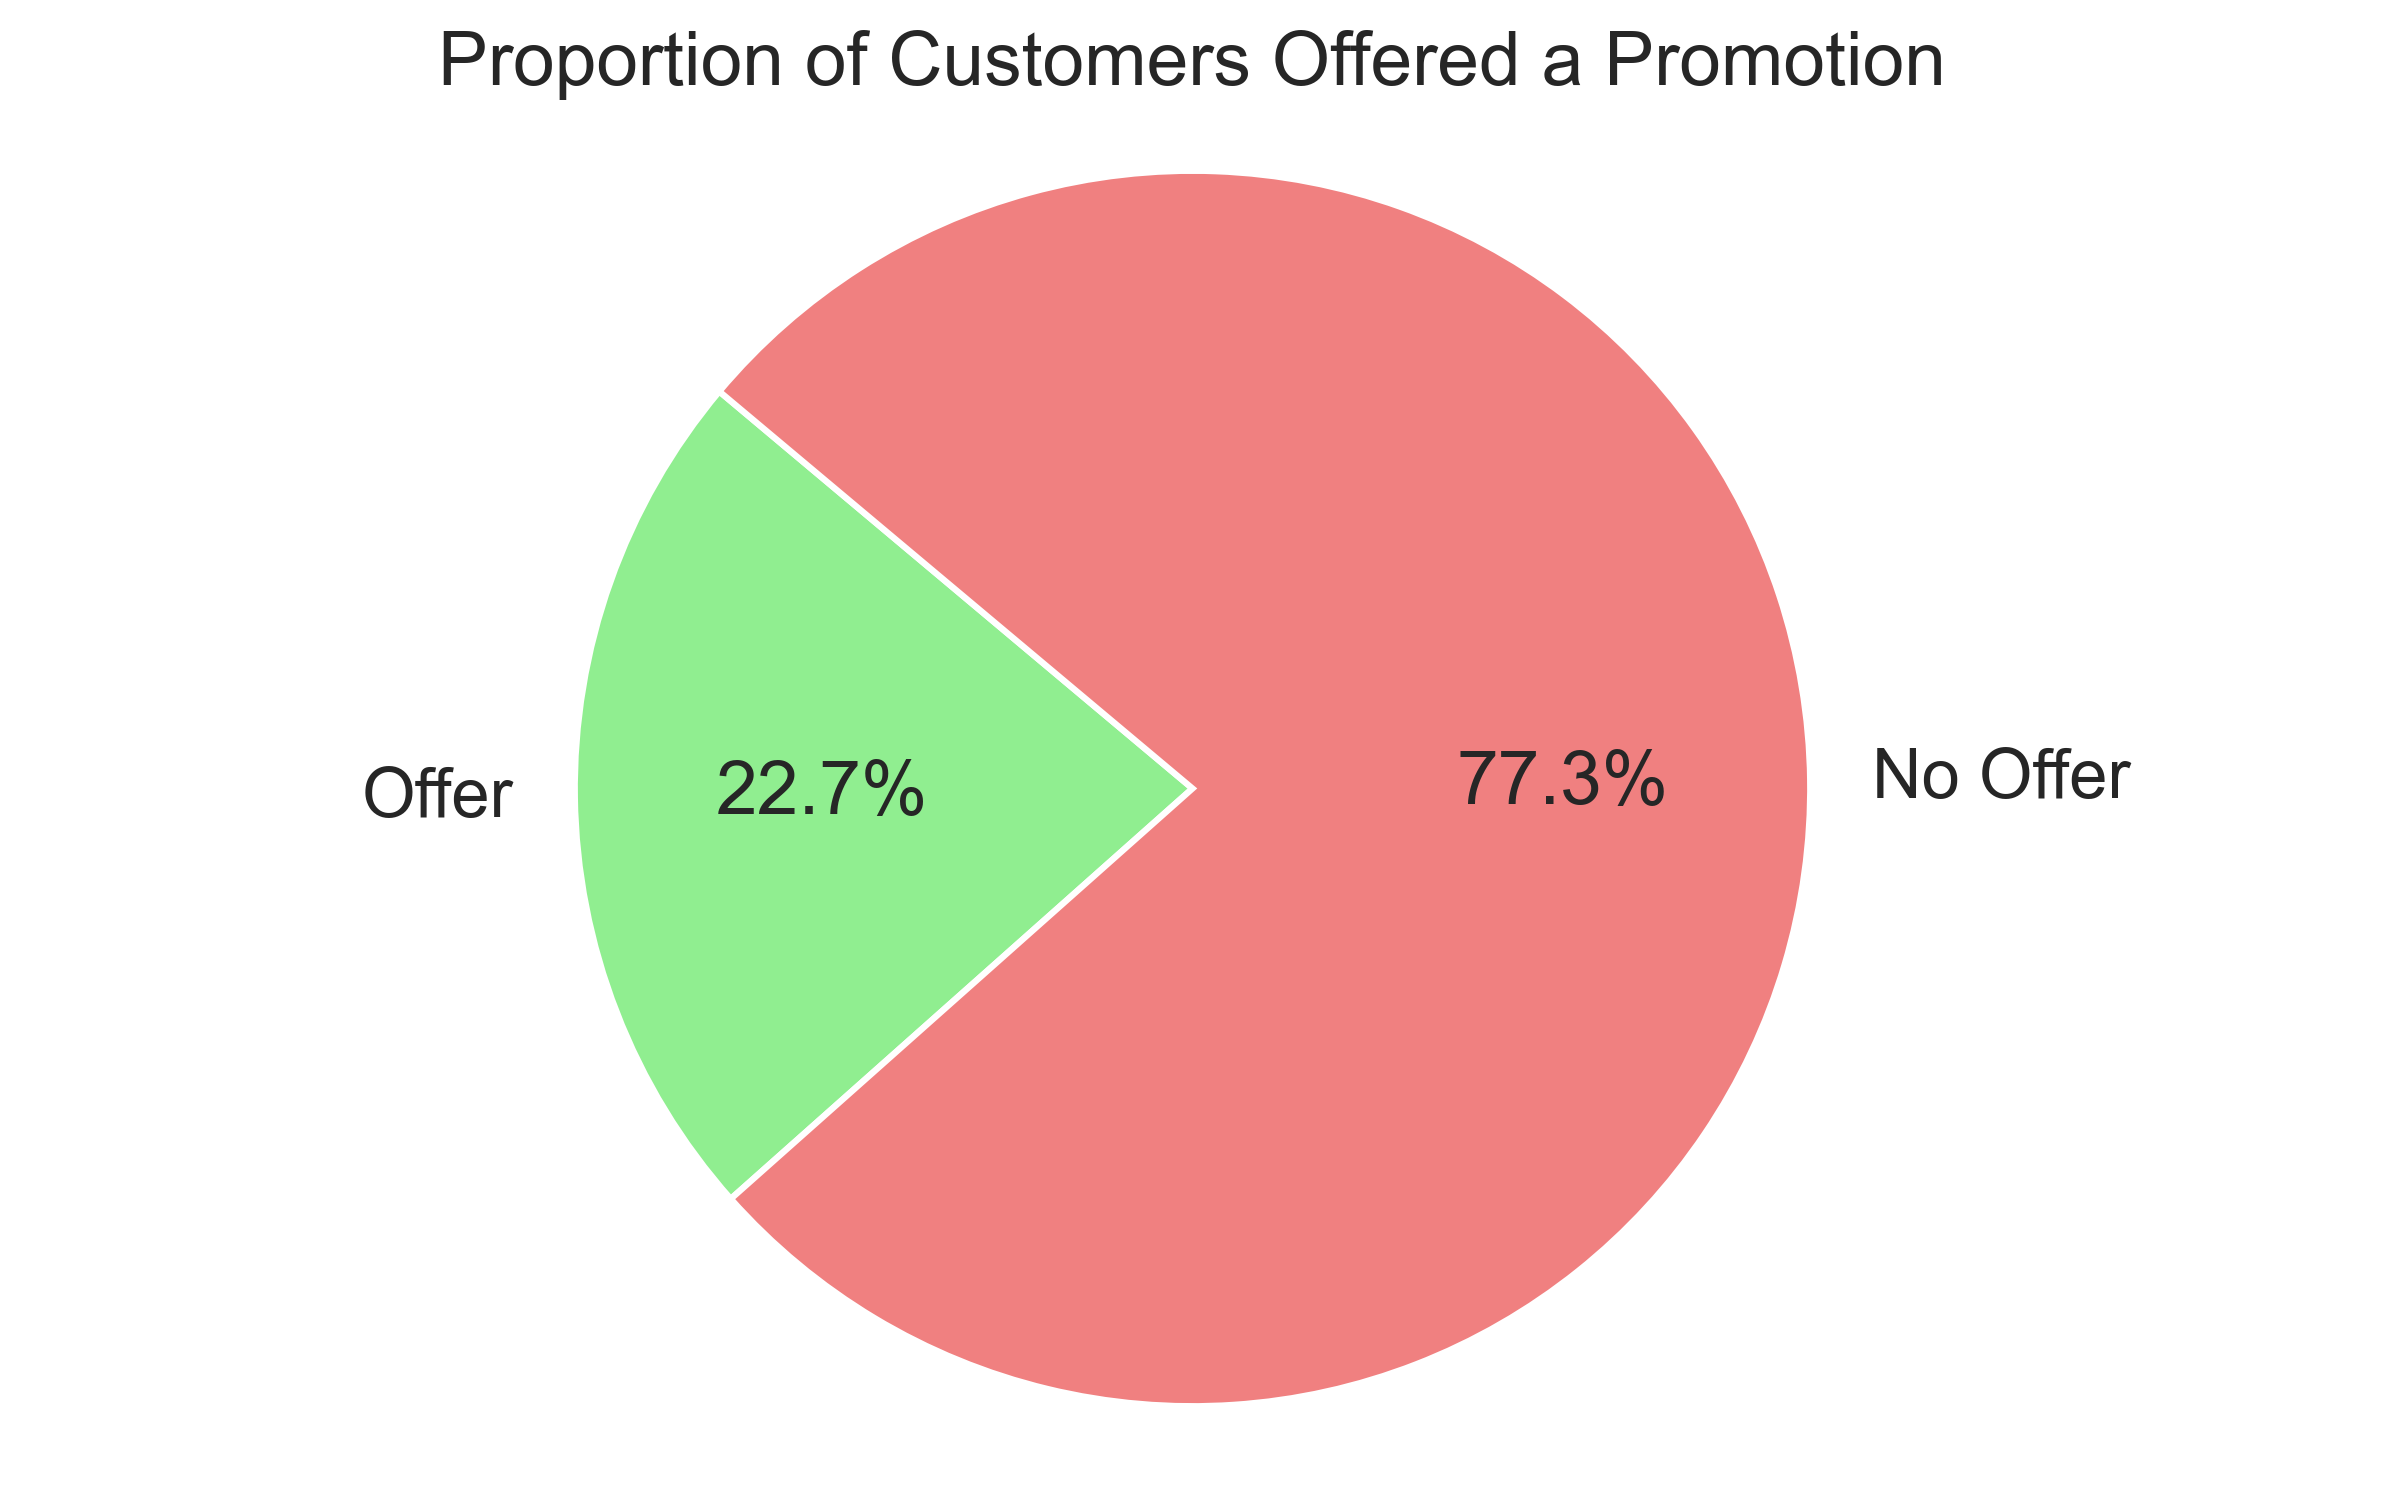

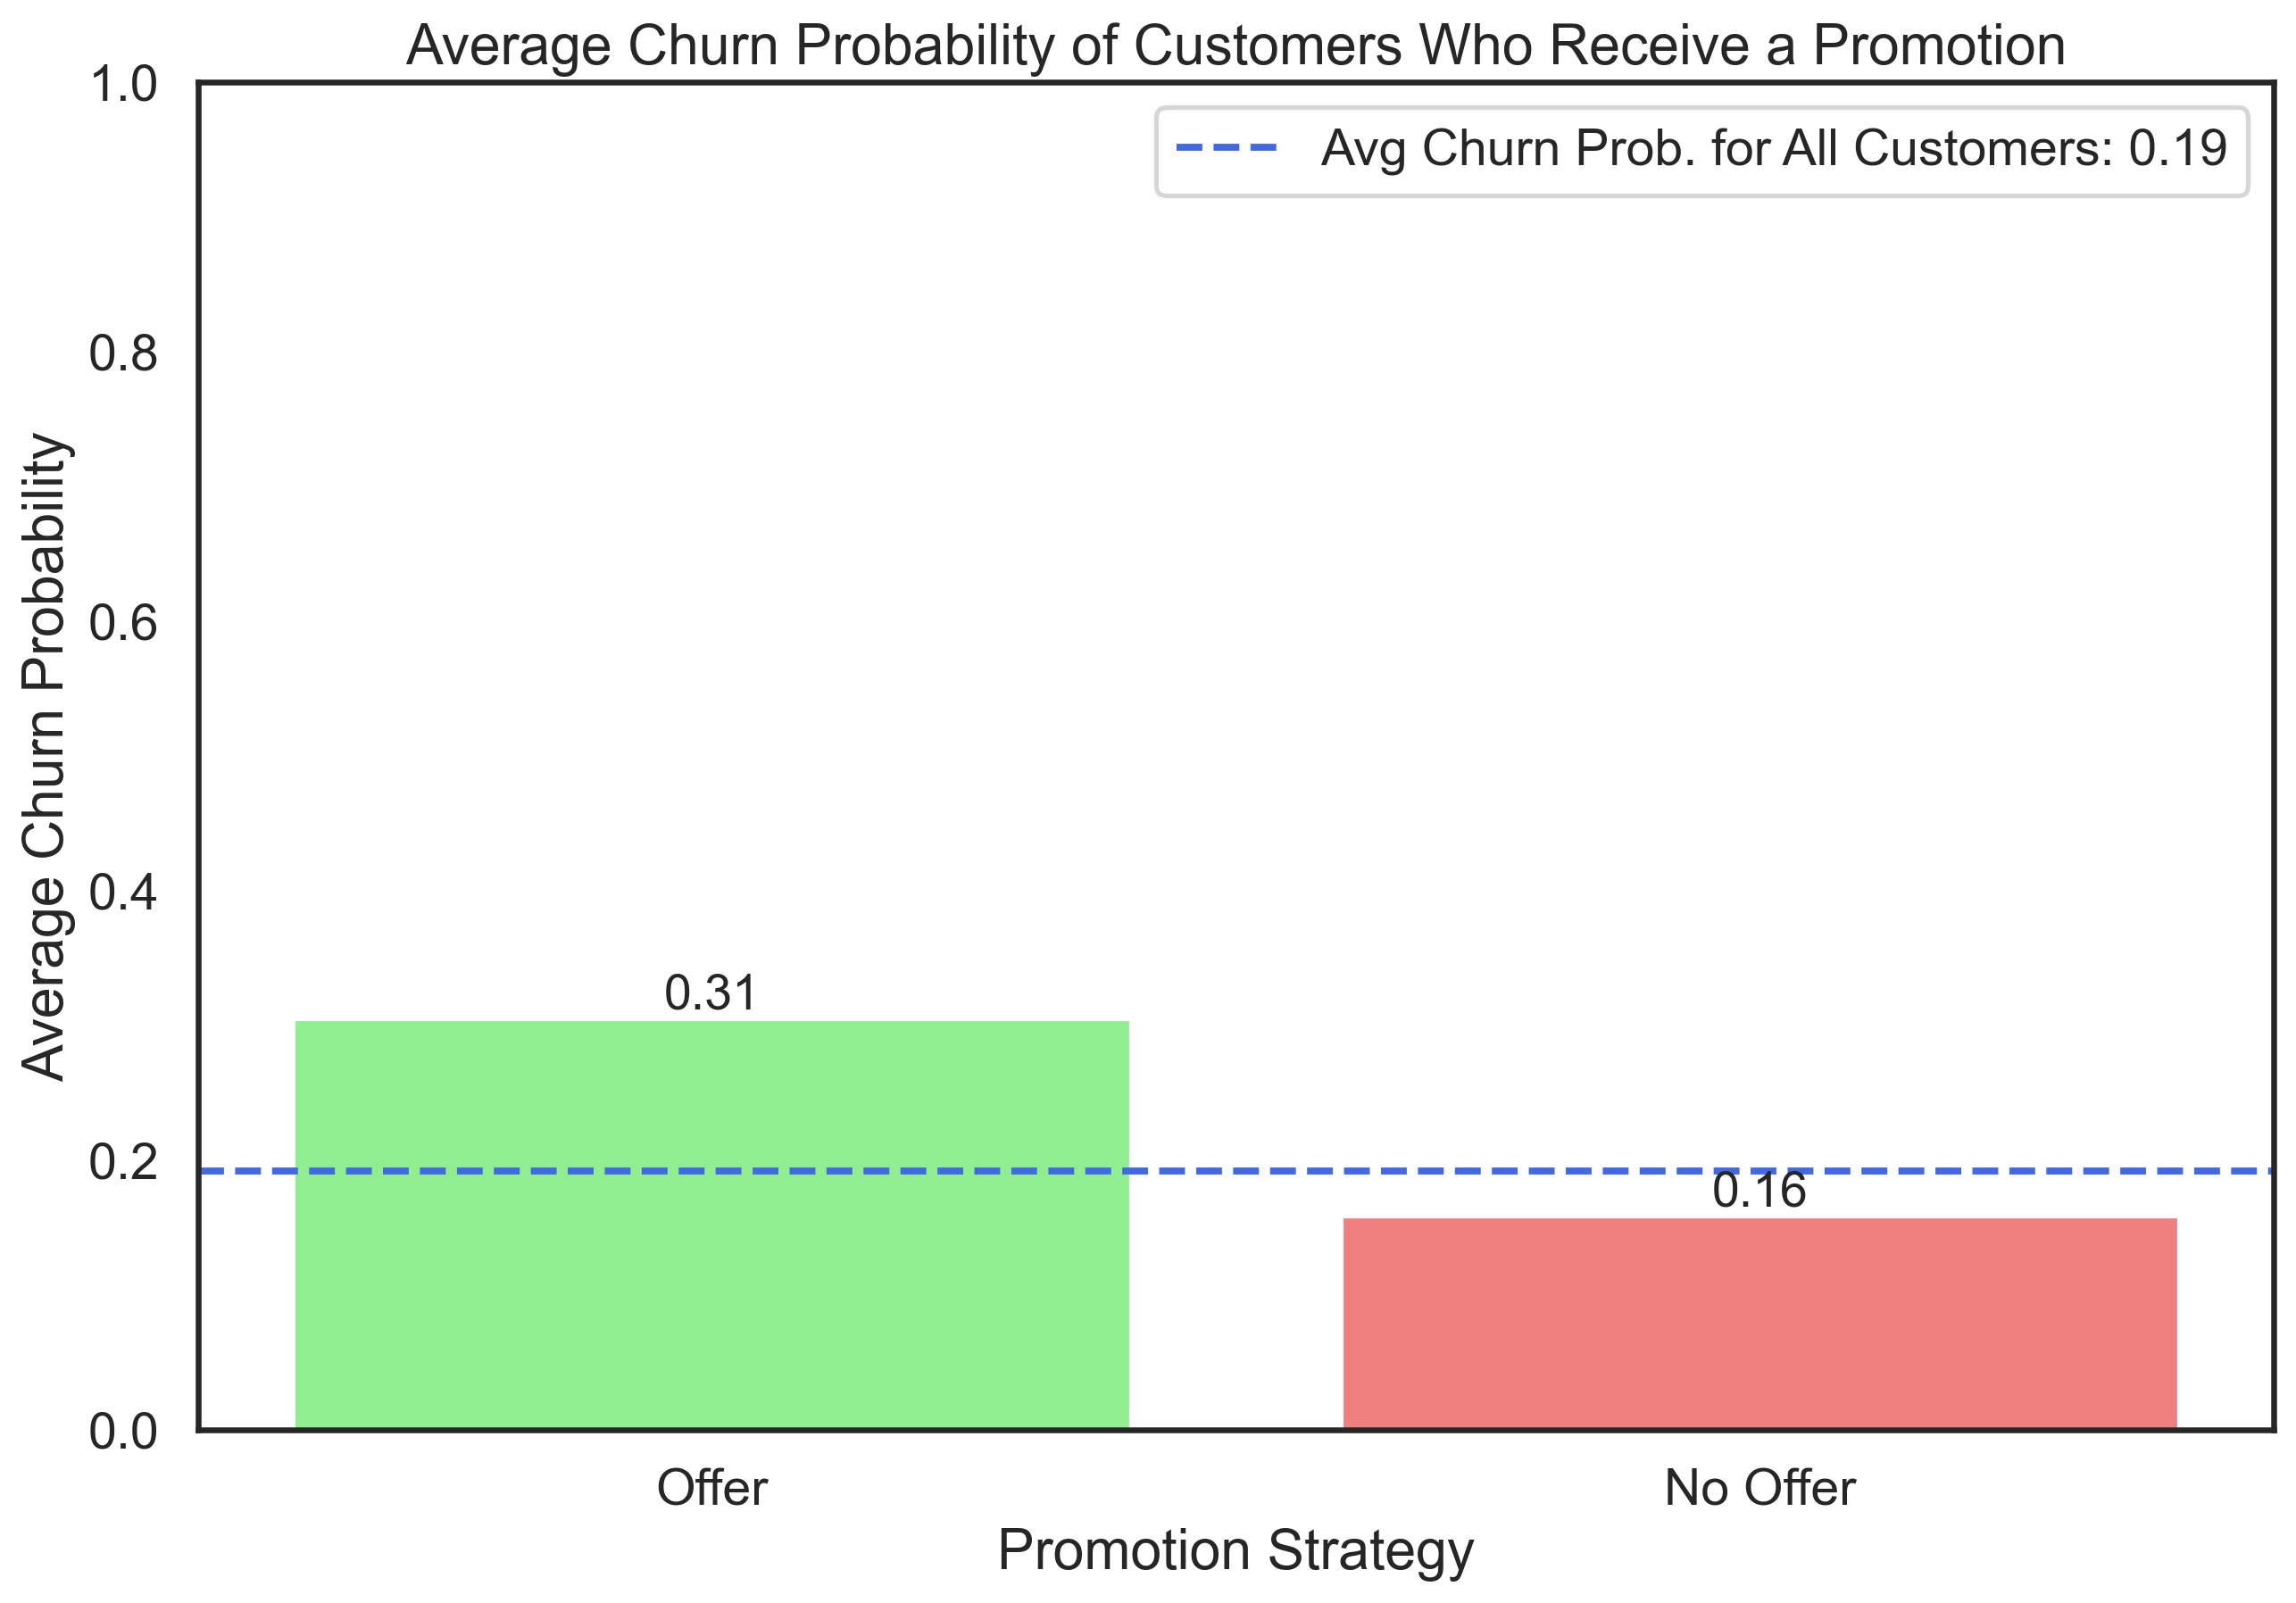

In [19]:
import gurobipy as gp
from gurobipy import GRB


budget_per_customer = 500  
max_budget = 1000000  


model = gp.Model('PromotionOptimization')

num_customers = len(churn_probabilities)
x = model.addVars(num_customers, vtype=GRB.BINARY, name="promotion")
model.setObjective(sum(churn_probabilities[i] * x[i] for i in range(num_customers)), GRB.MAXIMIZE)
model.addConstr(sum(budget_per_customer * x[i] for i in range(num_customers)) <= max_budget, "Budget")

model.optimize()

# if model.status == GRB.OPTIMAL:
#     print("Optimal promotion strategy:")
#     for i in range(num_customers):
#         if x[i].x > 0.5:
#             print(f"Customer {i}: Offer promotion")

plot_solution(x,num_customers,churn_probabilities)

## Model 2